In [1]:
import sys
import numpy as np
sys.path.append('../../')
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from utils.config_utils import get_config
from utils.toolkit_utils import load_toolkit_datasets, get_trialized_data

/home/dmifsud/miniconda3/envs/rt-ndt/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = get_config()

In [3]:
config.defrost()

config.data.bin_size = 20
config.data.rem_xcorr = False
config.model.readin_init = 'cl'
config.dirs.dataset_dir = '/home/dmifsud/Projects/NDT-U/data/t11_fixed_decoder'

config.data.sessions = [
   't11.2021.07.13',
   't11.2021.07.20',
   't11.2021.07.27',
   't11.2021.07.30',
   't11.2021.08.13',
   't11.2021.08.16',
   't11.2021.08.26',
   't11.2021.09.02',
   't11.2021.09.08',
   # 't11.2021.09.20',
   't11.2021.10.14',
   # 't11.2021.10.21',
   # 't11.2021.11.02',
   # 't11.2021.11.15',
   # 't11.2021.12.02'
]

# range to align data to with PCR
config.data.cl_align_field = 'start_time'
config.data.cl_align_range = [-200, 200]

config.freeze()

In [4]:
datasets = load_toolkit_datasets(config)

[ 1.2000001e-03 -6.6254396e-19]
[-0.35355338  0.35355338]
[-0.35355338  0.35355338]
This is already binned at 20ms.
[ 1.2000001e-03 -6.6254396e-19]
[-0.35355338  0.35355338]
[-0.35355338  0.35355338]
This is already binned at 20ms.
[ 1.2000001e-03 -6.6254396e-19]
[0.35355338 0.35355338]
[0.35355338 0.35355338]
This is already binned at 20ms.
[ 1.2000001e-03 -6.6254396e-19]
[-0.35355338  0.35355338]
[-0.35355338  0.35355338]
This is already binned at 20ms.
[ 1.2000001e-03 -6.6254396e-19]
[0.35355338 0.35355338]
[0.35355338 0.35355338]
This is already binned at 20ms.
[ 1.2000001e-03 -6.6254396e-19]
[0.35355338 0.35355338]
[0.35355338 0.35355338]
This is already binned at 20ms.
[ 1.2000001e-03 -6.6254396e-19]
[0.35355338 0.35355338]
[0.35355338 0.35355338]
This is already binned at 20ms.
[ 1.2000001e-03 -6.6254396e-19]
[-0.35355338  0.35355338]
[-0.35355338  0.35355338]
This is already binned at 20ms.
[ 1.2000001e-03 -6.6254396e-19]
[-0.35355338  0.35355338]
[-0.35355338  0.35355338]
This

In [5]:
trialized_data = get_trialized_data(config, datasets)

NaNs found in `self.data`. Dropping 0.69% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 0.61% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 0.63% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 0.62% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 0.32% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 0.49% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 0.98% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 0.83% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 0.83% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 0.71% of points to remove NaNs from `trial_data`.


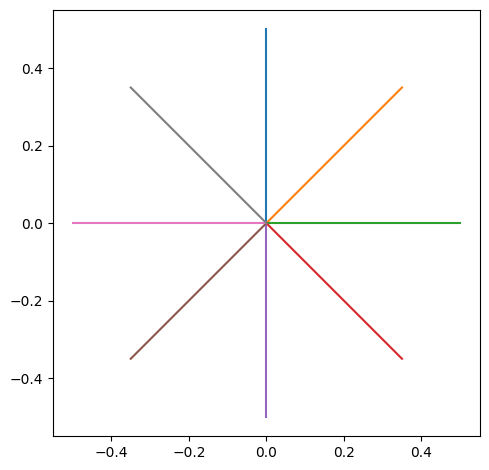

In [6]:
# Conditions plot

COND_IDS = {
    (-1.0, -1.0): -1,
    (0.00, 0.00): 0,
    (0.00, 0.50): 1,
    (0.35, 0.35): 2,
    (0.50, 0.00): 3,
    (0.35, -0.35): 4,
    (0.00, -0.50): 5,
    (-0.35, -0.35): 6,
    (-0.50, 0.00): 7,
    (-0.35, 0.35): 8
}

fig = plt.figure()
ax = fig.add_subplot(111)

for k, v in COND_IDS.items():
    if v > 0:
        plt.plot([0.0, k[0]], [0.0, k[1]], color=f'{colors.rgb2hex(cm.tab10(v-1))}')

ax.set_aspect("equal")
plt.tight_layout()
plt.savefig(f'images/condition_colors', facecolor='white', transparent=False)
plt.show()

In [7]:
# matplotlib configs
n_plots = len(config.data.sessions)
n_cols = 3
n_rows = (n_plots // n_cols) + (1 if n_plots % n_cols != 0 else 0)

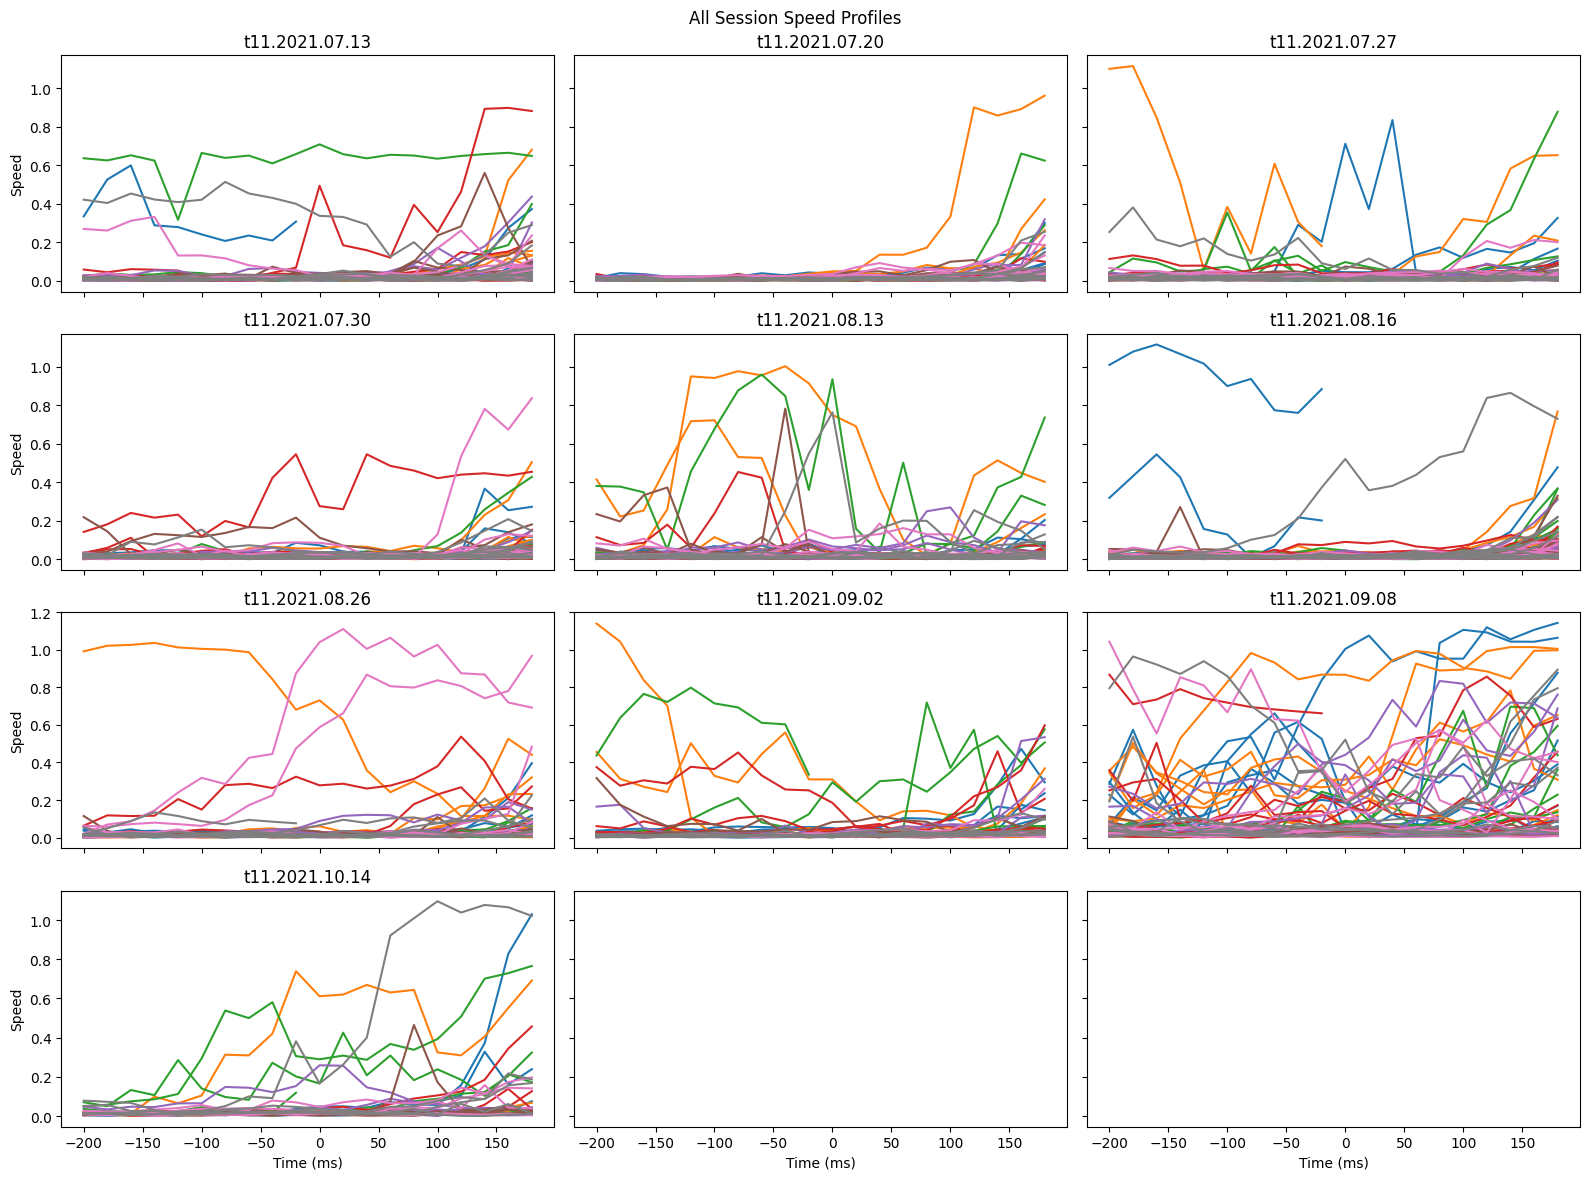

In [8]:
# Speed plot

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 12), sharex='col', sharey='row')

for idx, session in enumerate(config.data.sessions):
    for cond_id in range(1, 9):
        for trial_id, trial in trialized_data[session]['cl_trial_data'].groupby('trial_id'):
            if datasets[session].trial_info.loc[trial_id].cond_id == cond_id:
                # get speed where condition is above 0, filter out -1,-1 targets
                speed = np.linalg.norm(trial.cursor_vel, axis=1)
                # speed = np.linalg.norm(trial.cursor_vel.loc[trial.cond_id.n > 0], axis=1)

                # plot trial
                axs.flat[idx].plot(
                    range(config.data.cl_align_range[0], config.data.cl_align_range[0]+len(speed)*20, 20), 
                    speed, 
                    color=f'{colors.rgb2hex(cm.tab10(cond_id-1))}'
                )
                axs.flat[idx].set_title(session)

for ax in axs.flat: ax.set(xlabel='Time (ms)', ylabel='Speed')
for ax in axs.flat: ax.label_outer()

plt.suptitle('All Session Speed Profiles')
plt.tight_layout()
plt.savefig(f'images/all_sessions_speeds', facecolor='white', transparent=False)
plt.show()

In [9]:
for trial_id, trial in trialized_data['t11.2021.07.13']['cl_trial_data'].groupby('trial_id'):
# for trial_id, trial in trialized_data['t11.2021.07.13']['cl_trial_data'].groupby(('cond_id','n')):
        # if datasets[session].trial_info.loc[trial_id].cond_id == cond_id:
    # if trial_id > 0:
    # get speed where condition is above 0, filter out -1,-1 targets
    print(trial_id)
    # for i in zip(trial.target_pos.x, trial.target_pos.y):
    #     print(i)
    for i in trial.cond_id.n:
        print(i)

0
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
8
8
8
8
8
8
8
8
8
8
3
8
8
8
8
8
8
8
8
8
8
0
0
0
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
6
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
7
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
8
0
0
0
0
0
0
0
0
0
0
5
5
5
5
5
5
5
5
5
5
9
5
5
5
5
5
5
5
5
5
5
0
0
0
0
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
11
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
12
0
0
0
0
0
0
0
0
0
0
4
4
4
4
4
4
4
4
4
4
13
4
4
4
4
4
4
4
4
4
4
0
0
0
0
0
0
0
0
0
0
14
0
0
0
0
0
0
0
0
0
0
7
7
7
7
7
7
7
7
7
7
15
7
7
7
7
7
7
7
7
7
7
0
0
0
0
0
0
0
0
0
0
16
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
17
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
18
0
0
0
0
0
0
0
0
0
0
4
4
4
4
4
4
4
4
4
4
19
4
4
4
4
4
4
4
4
4
4
0
0
0
0
0
0
0
0
0
0
20
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
21
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
22
0
0
0
0
0
0
0
0
0
0
8
8
8
8
8
8
8
8
8
8
23
8
8
8
8
8
8
8
8
8
8
0
0
0
0
0
0
0
0
0


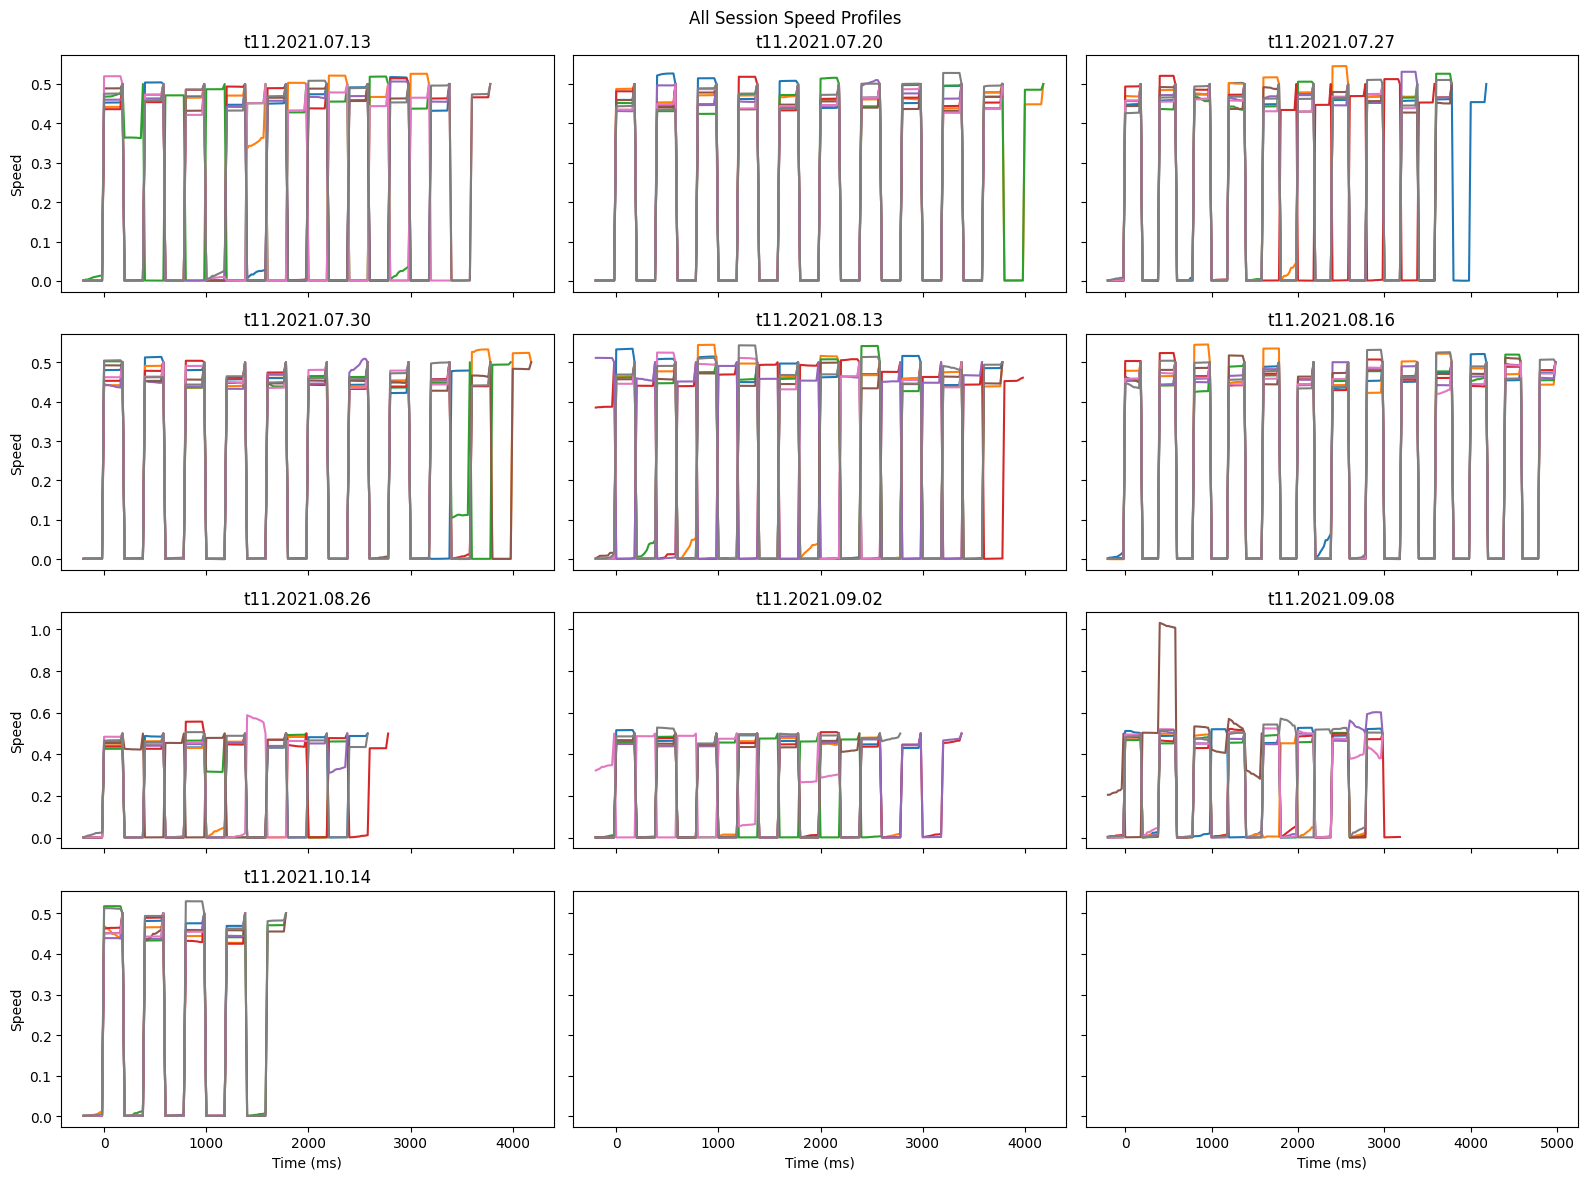

In [10]:
# Speed plot

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 12), sharex='col', sharey='row')

for idx, session in enumerate(config.data.sessions):
    for trial_id, trial in trialized_data[session]['cl_trial_data'].groupby(('cond_id','n')):
        # if datasets[session].trial_info.loc[trial_id].cond_id == cond_id:
        if trial_id > 0:
        # get speed where condition is above 0, filter out -1,-1 targets
            speed = np.linalg.norm(trial.cursor_pos, axis=1)
            # speed = np.linalg.norm(trial.cursor_vel.loc[trial.cond_id.n > 0], axis=1)

            # plot trial
            axs.flat[idx].plot(
                range(config.data.cl_align_range[0], config.data.cl_align_range[0]+len(speed)*20, 20), 
                speed, 
                color=f'{colors.rgb2hex(cm.tab10(trial_id-1))}'
            )
            axs.flat[idx].set_title(session)

for ax in axs.flat: ax.set(xlabel='Time (ms)', ylabel='Speed')
for ax in axs.flat: ax.label_outer()

plt.suptitle('All Session Speed Profiles')
plt.tight_layout()
plt.savefig(f'images/all_sessions_speeds', facecolor='white', transparent=False)
plt.show()

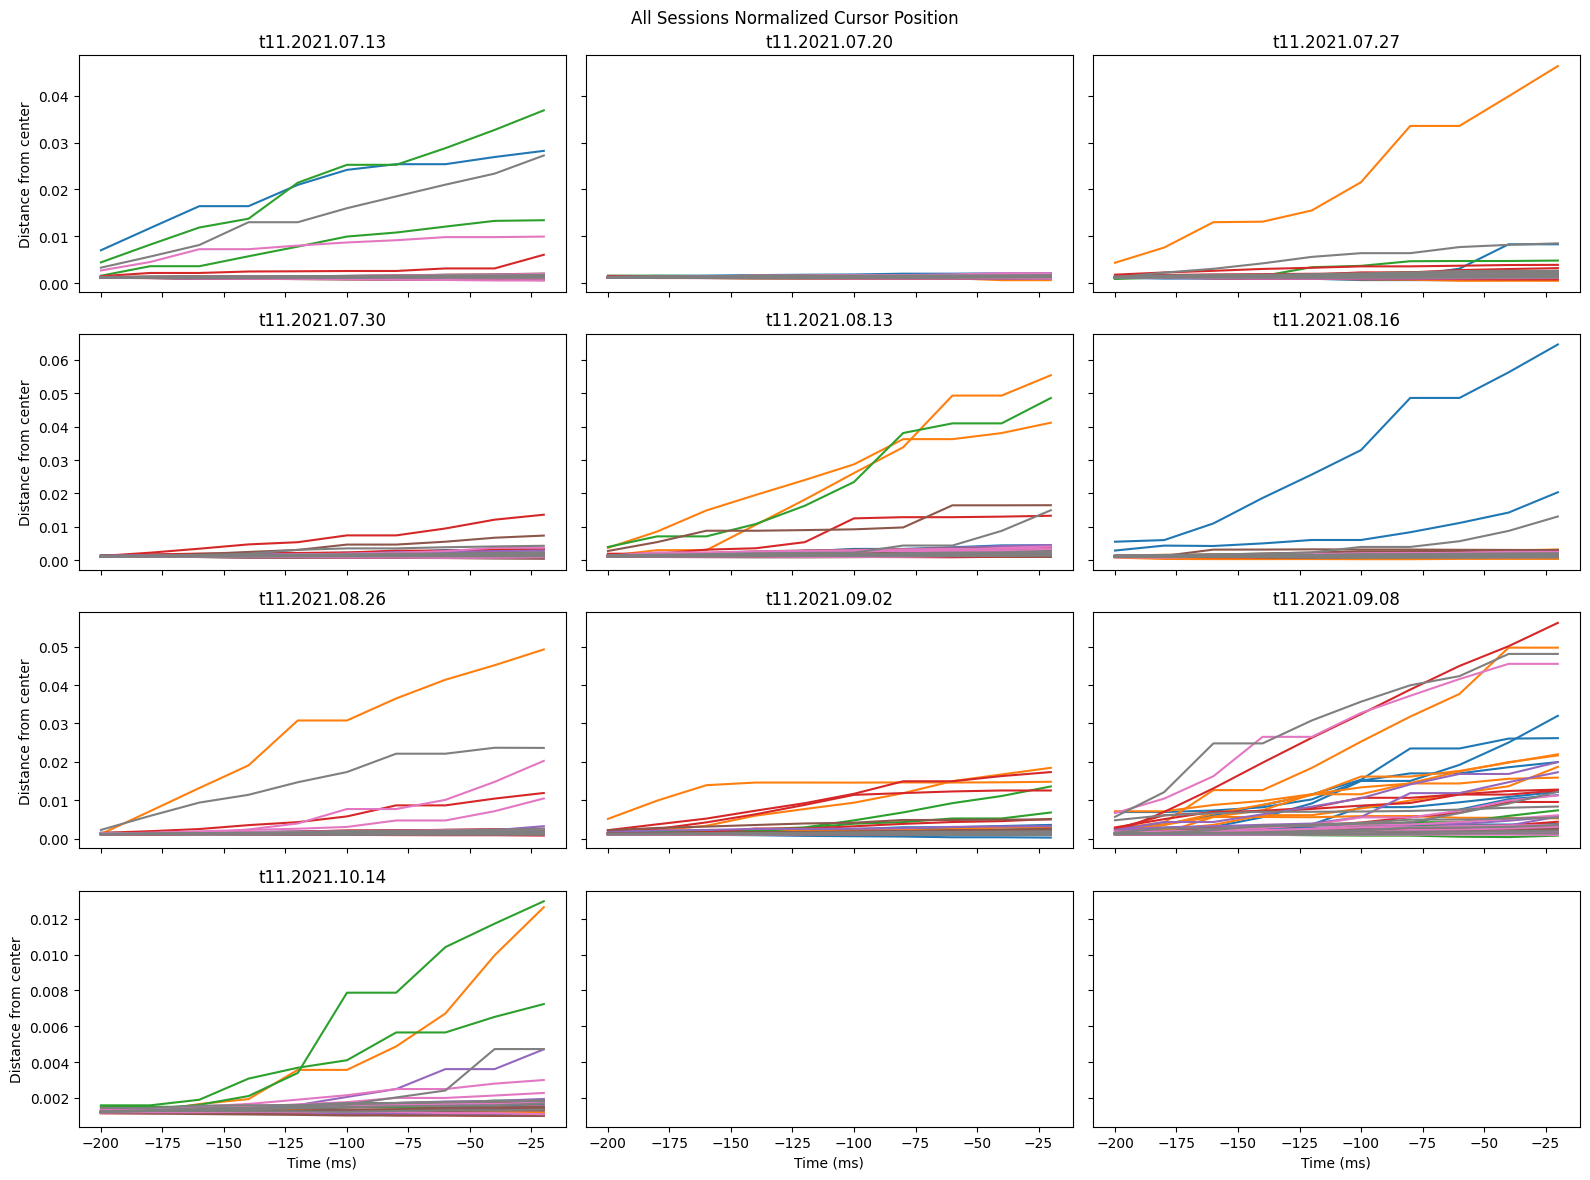

In [11]:
# Cursor Pos Plot

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 12), sharex='col', sharey='row')

for idx, session in enumerate(config.data.sessions):
    for cond_id in range(1, 9):
        for trial_id, trial in trialized_data[session]['cl_trial_data'].groupby('trial_id'):
            if datasets[session].trial_info.loc[trial_id].cond_id == cond_id:
                # get position where condition is above 0, filter out -1,-1 targets
                pos = np.linalg.norm(trial.cursor_pos.loc[trial.cond_id.n > 0], axis=1)

                # plot trial
                axs.flat[idx].plot(
                    range(config.data.cl_align_range[0], config.data.cl_align_range[0]+len(pos)*20, 20), 
                    pos, 
                    color=f'{colors.rgb2hex(cm.tab10(cond_id-1))}'
                )
                axs.flat[idx].set_title(session)

for ax in axs.flat: ax.set(xlabel='Time (ms)', ylabel='Distance from center')
for ax in axs.flat: ax.label_outer()

plt.suptitle('All Sessions Normalized Cursor Position')
plt.tight_layout()
plt.savefig(f'images/all_sessions_curosr_pos', facecolor='white', transparent=False)
plt.show()

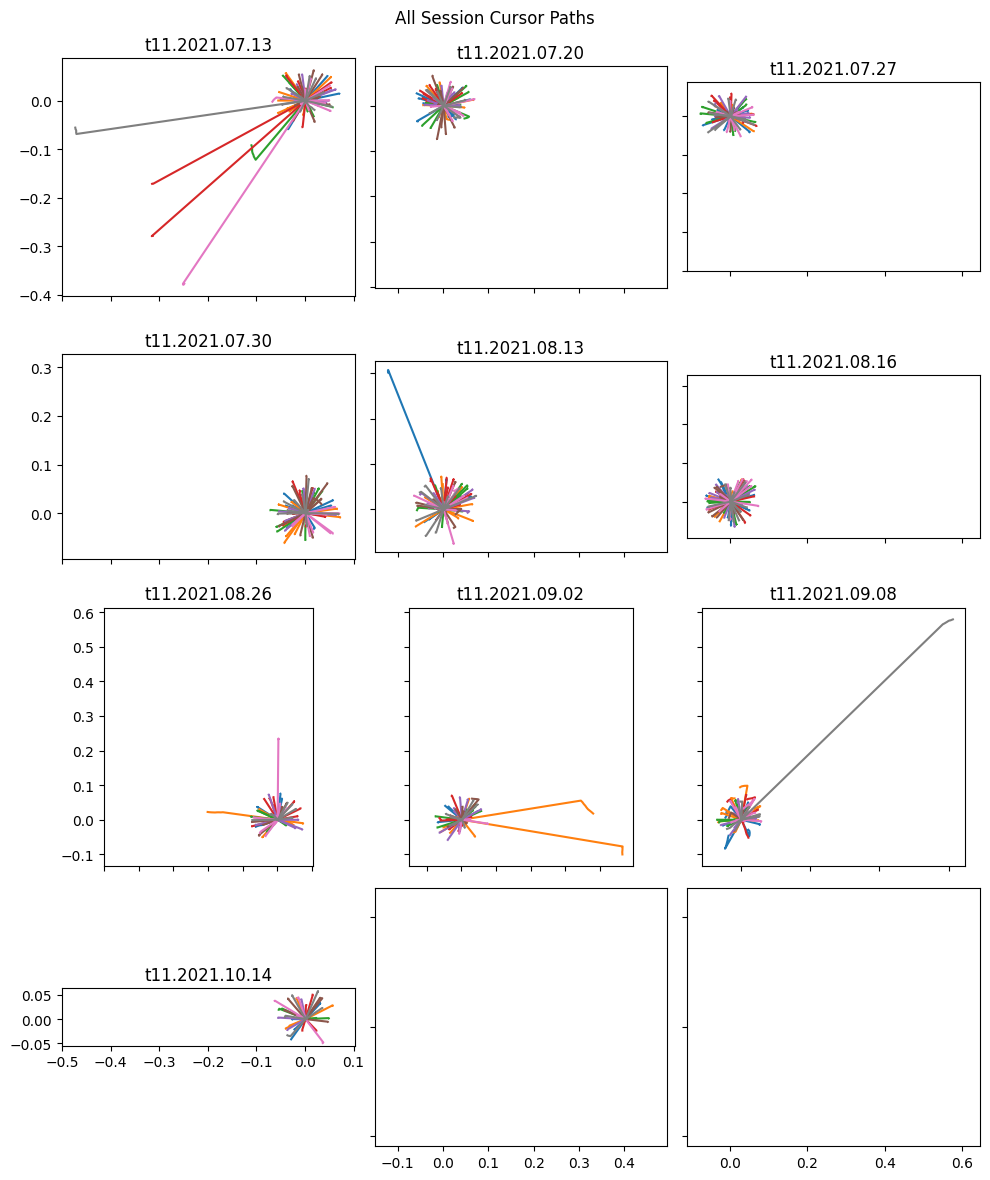

In [12]:
# Cursor Paths Plot

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 12), sharex='col', sharey='row')

for idx, session in enumerate(config.data.sessions):
    for cond_id in range(1, 9):
        for trial_id, trial in trialized_data[session]['cl_trial_data'].groupby('trial_id'):
            if datasets[session].trial_info.loc[trial_id].cond_id == cond_id:
                # get position where condition is above 0, filter out -1,-1 targets
                path = trial.cursor_pos
                # path = trial.cursor_pos.loc[trial.cond_id.n > 0]
                
                # plot trial
                axs.flat[idx].plot(
                    path.to_numpy()[:, 0], 
                    path.to_numpy()[:, 1], 
                    color=f'{colors.rgb2hex(cm.tab10(cond_id-1))}'
                )
                axs.flat[idx].set_title(session)
                axs.flat[idx].set_aspect("equal")

plt.suptitle('All Session Cursor Paths')
plt.tight_layout()
plt.savefig(f'images/all_sessions_paths', facecolor='white', transparent=False)
plt.show()

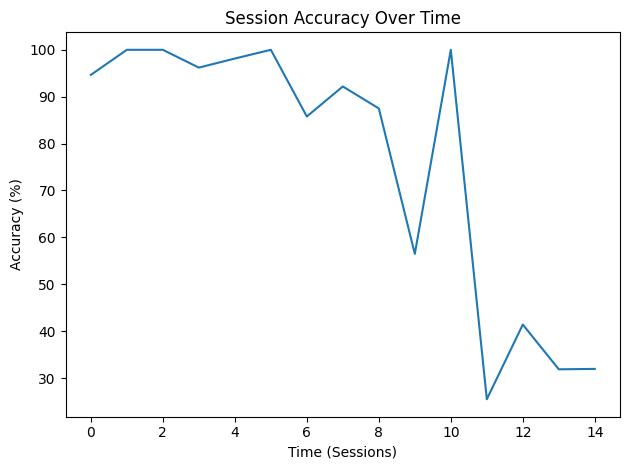

In [13]:
# Session Accuracy plot

session_accuracy = [
    94.65277777777777,
    100.0,
    100.0,
    96.20253164556962,
    98.13728598604945,
    100.0,
    85.77648766328011,
    92.18092566619916,
    87.49726775956285,
    56.478405315614616,
    100.0,
    25.470925470925472,
    41.3992297817715,
    31.853281853281853,
    31.944444444444443
]

plt.plot(session_accuracy)
plt.title('Session Accuracy Over Time')
plt.xlabel('Time (Sessions)')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.savefig(f'images/all_session_accuracy', facecolor='white', transparent=False)
plt.show()